In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL as Image

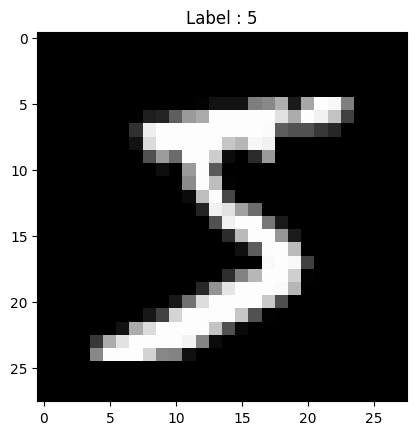

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.0981 - loss: 0.0262 - val_accuracy: 0.0980 - val_loss: 7568.0142
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.0980 - loss: 1.7067e-09 - val_accuracy: 0.0980 - val_loss: 7570.7158
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.0995 - loss: 2.2423e-09 - val_accuracy: 0.0980 - val_loss: 7577.7134
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.0980 - loss: 1.9255e-09 - val_accuracy: 0.0980 - val_loss: 7596.4072
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.0970 - loss: 1.6371e-09 - val_accuracy: 0.0980 - val_loss: 7637.7935
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0924 - loss: 7432.8047
Test Accuracy : 0.0980


AttributeError: module 'PIL' has no attribute 'open'

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

plt.imshow(train_images[0], cmap = 'gray')
plt.title(f'Label : {train_labels[0]}')
plt.show()

train_images = train_images/225.0
train_labels = train_labels/225.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test Accuracy : {test_acc:.4f}')

image_path = 'path_to_your_image.png'
image = Image.open(image_path).convert('L')
img = img.resize((28,28))
img_array = np.array(img)
img_array = img_array/255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

print(f'Predicted Class : {predicted_class}')

